In [635]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')

In [636]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [637]:
data = pd.read_csv("day.csv")
data.head()
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

In [638]:
categorial_features = ['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit'] 
real_features = ['temp', 'atemp', 'hum', 'windspeed'] 
target_feature = 'cnt'

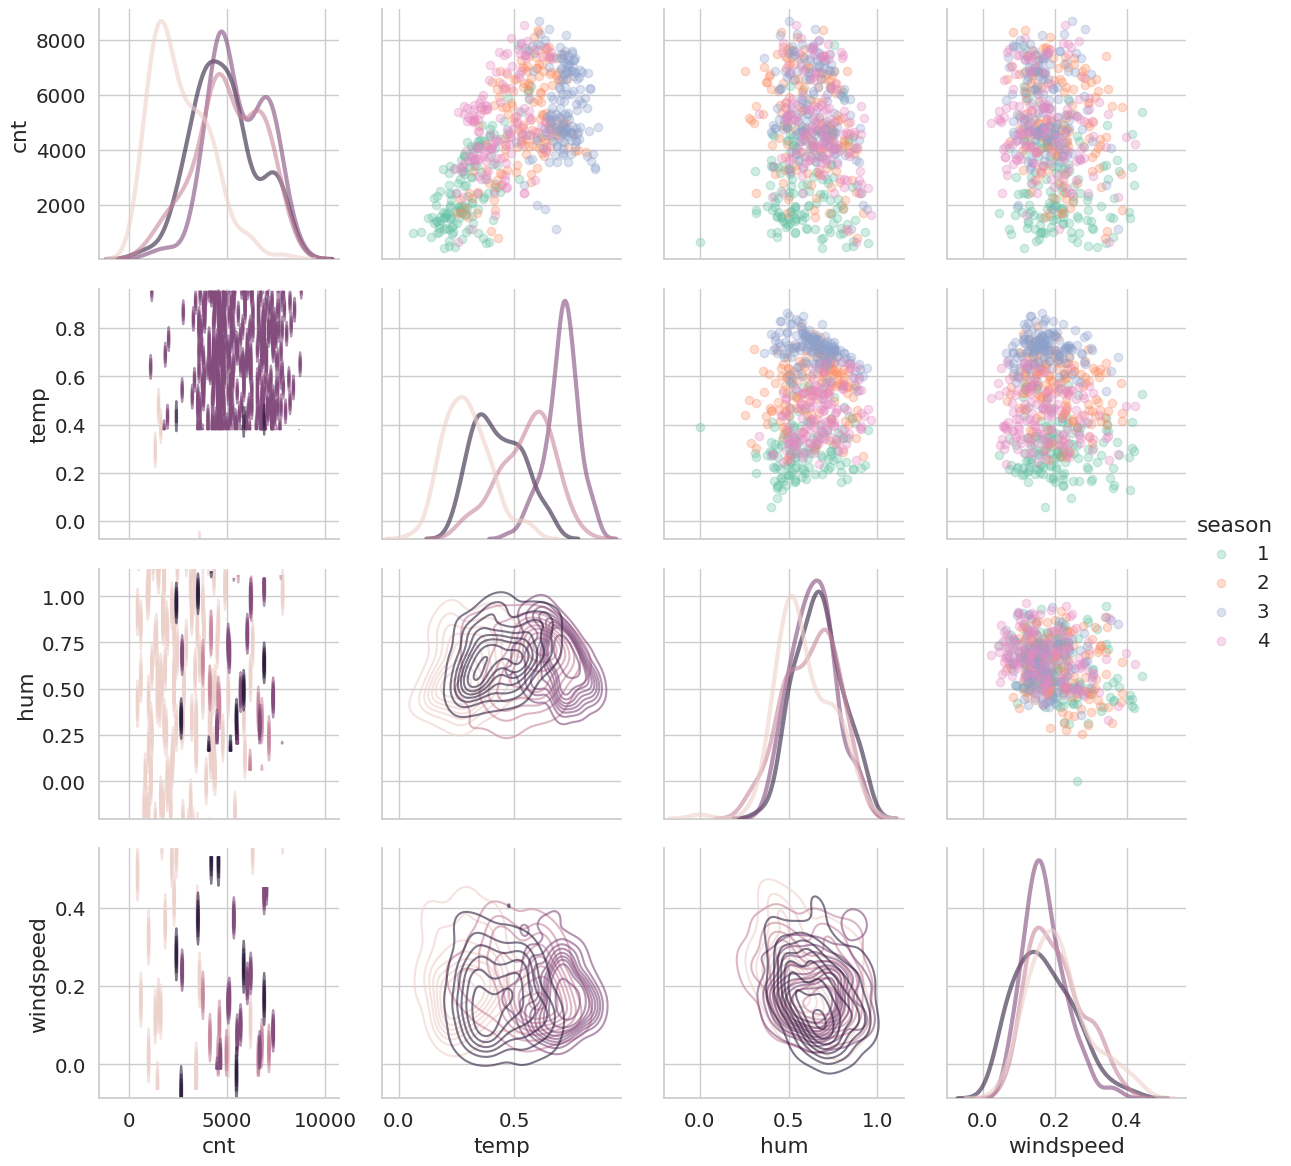

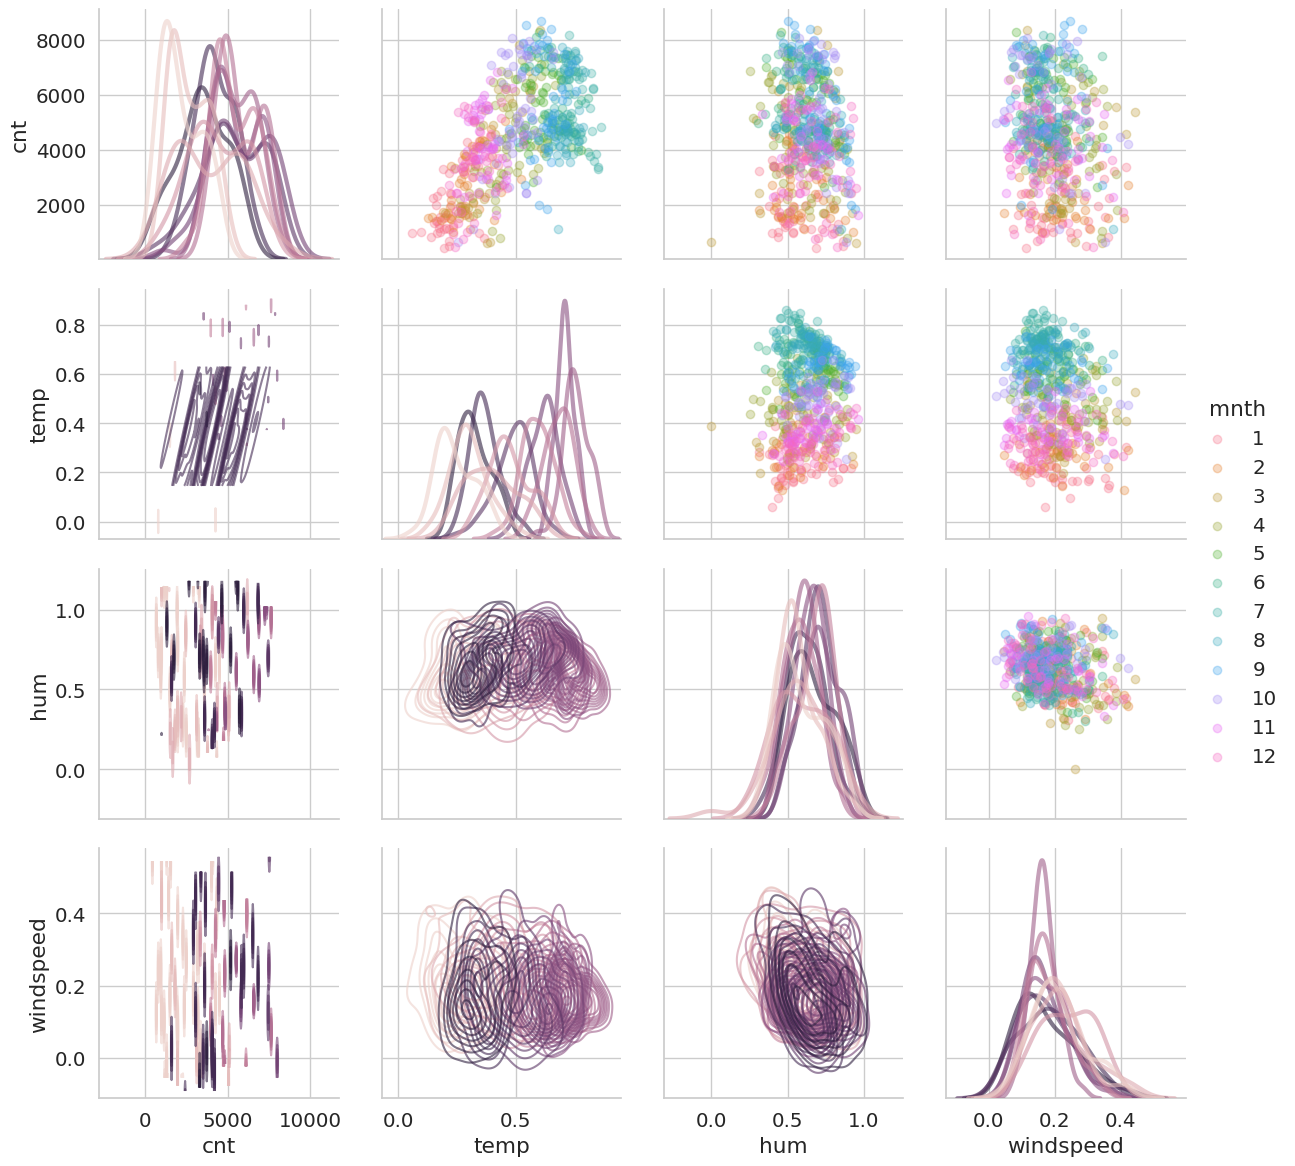

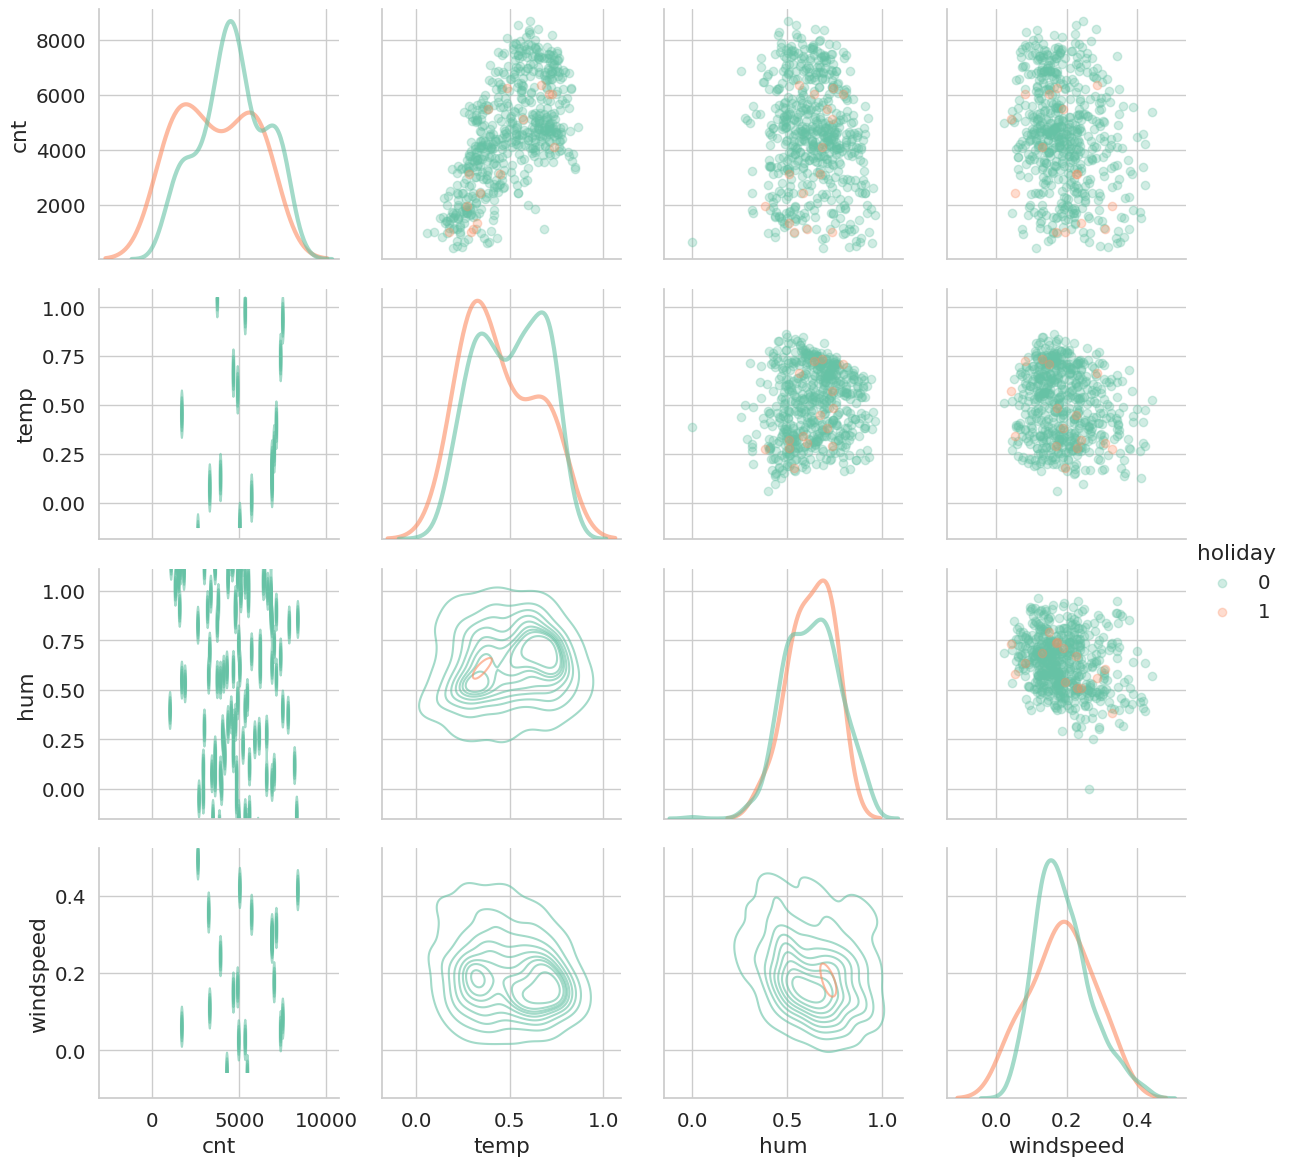

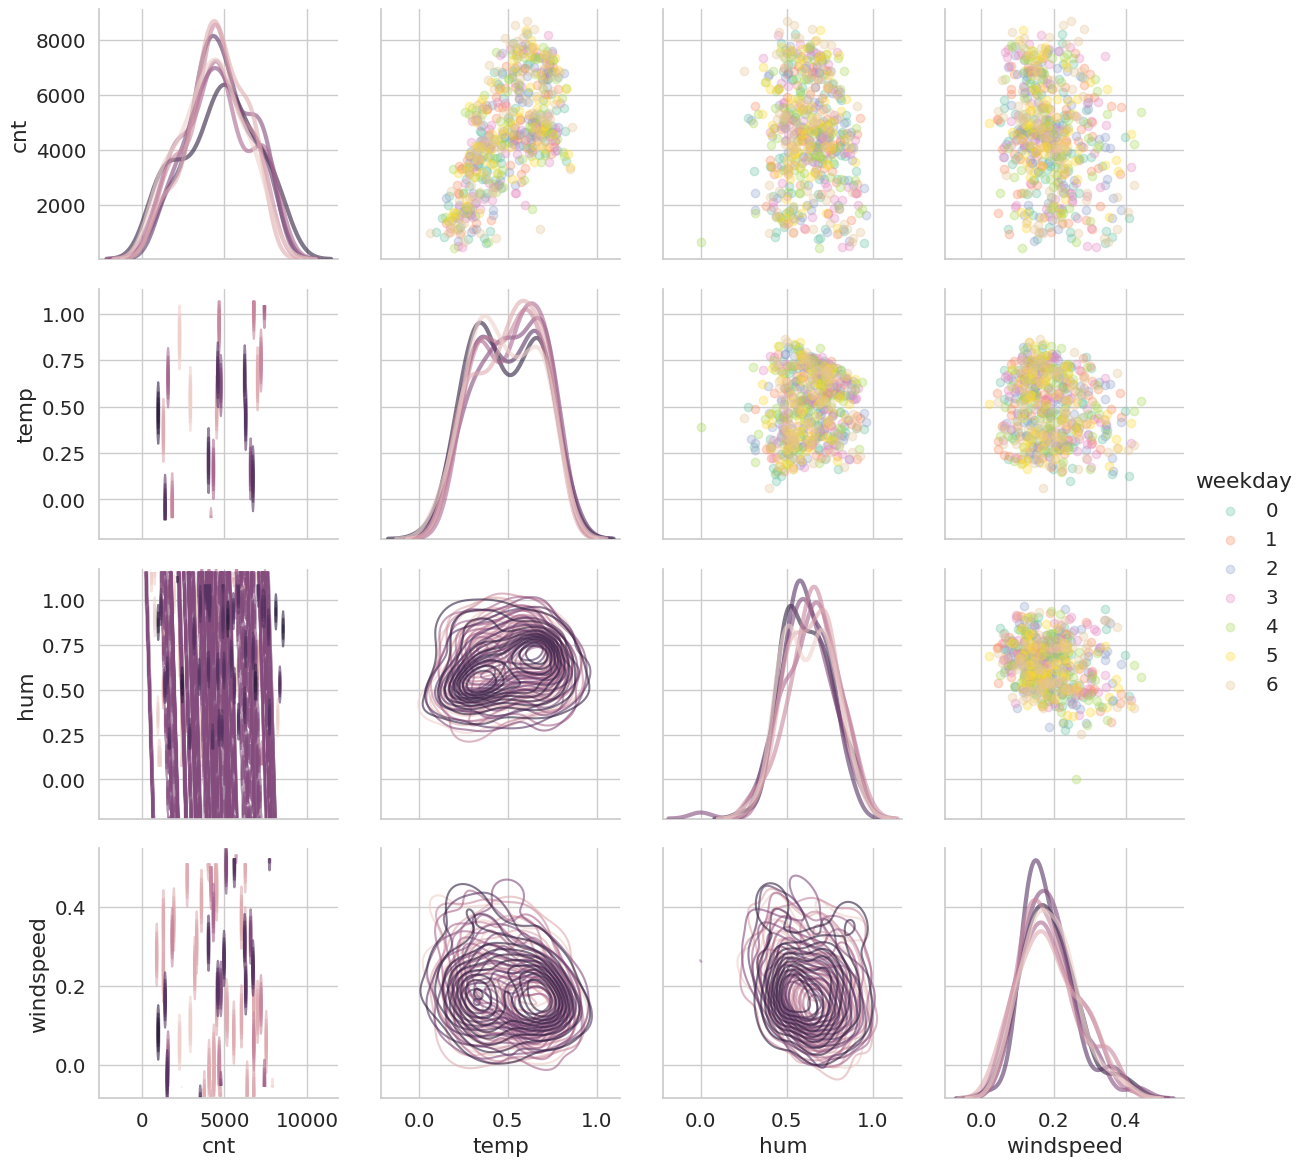

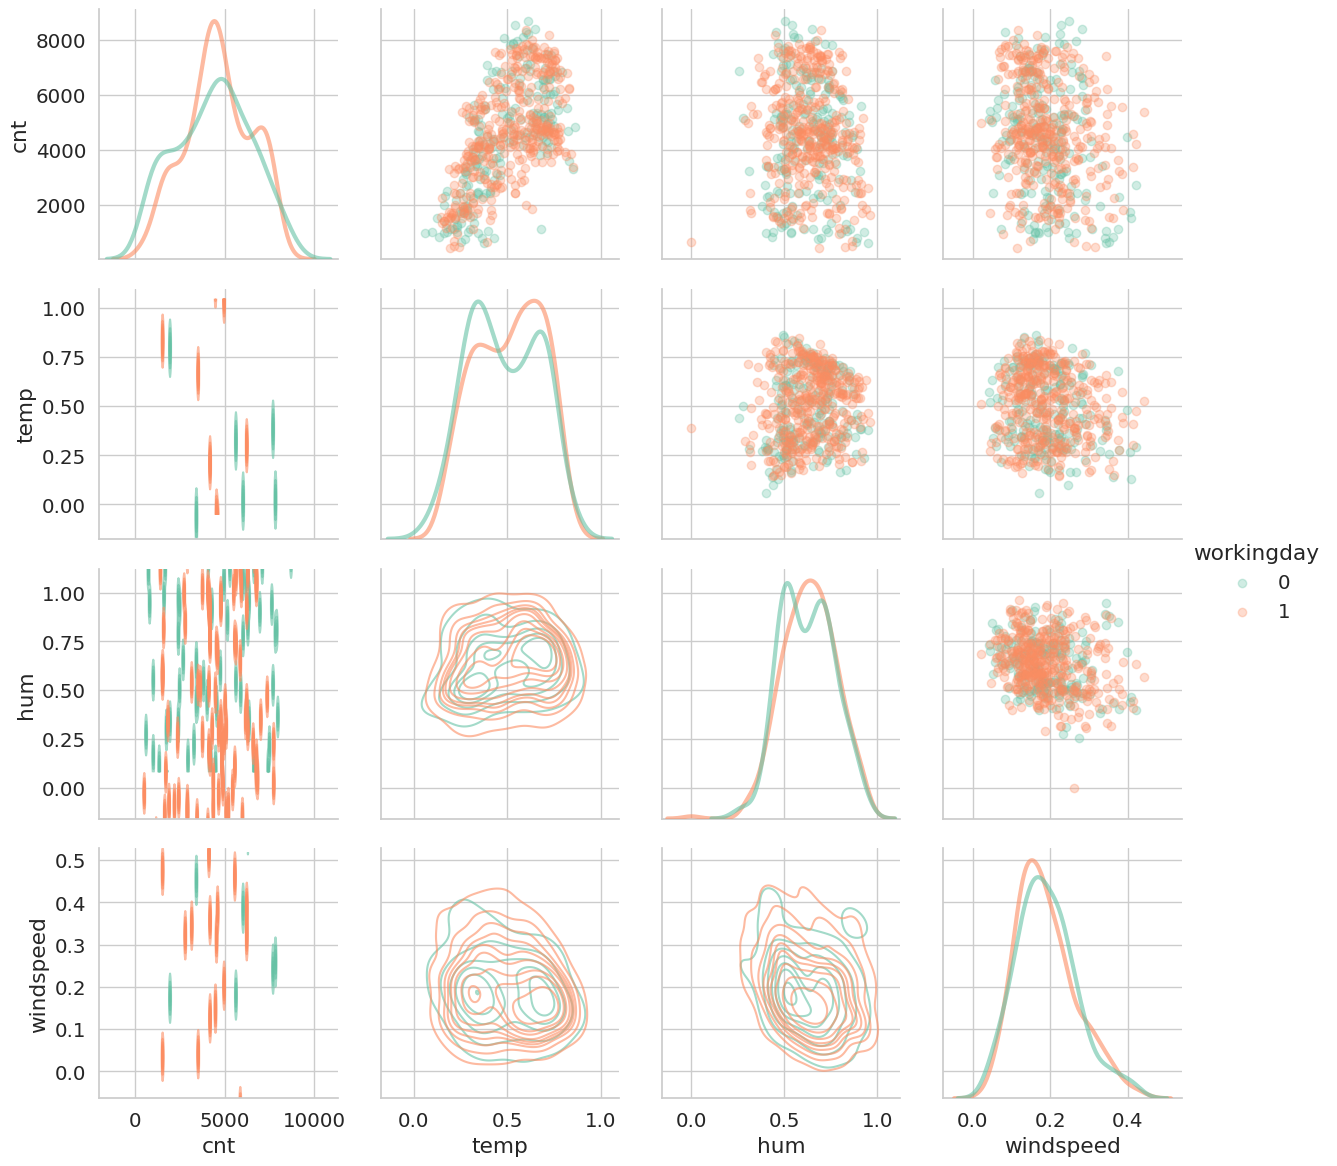

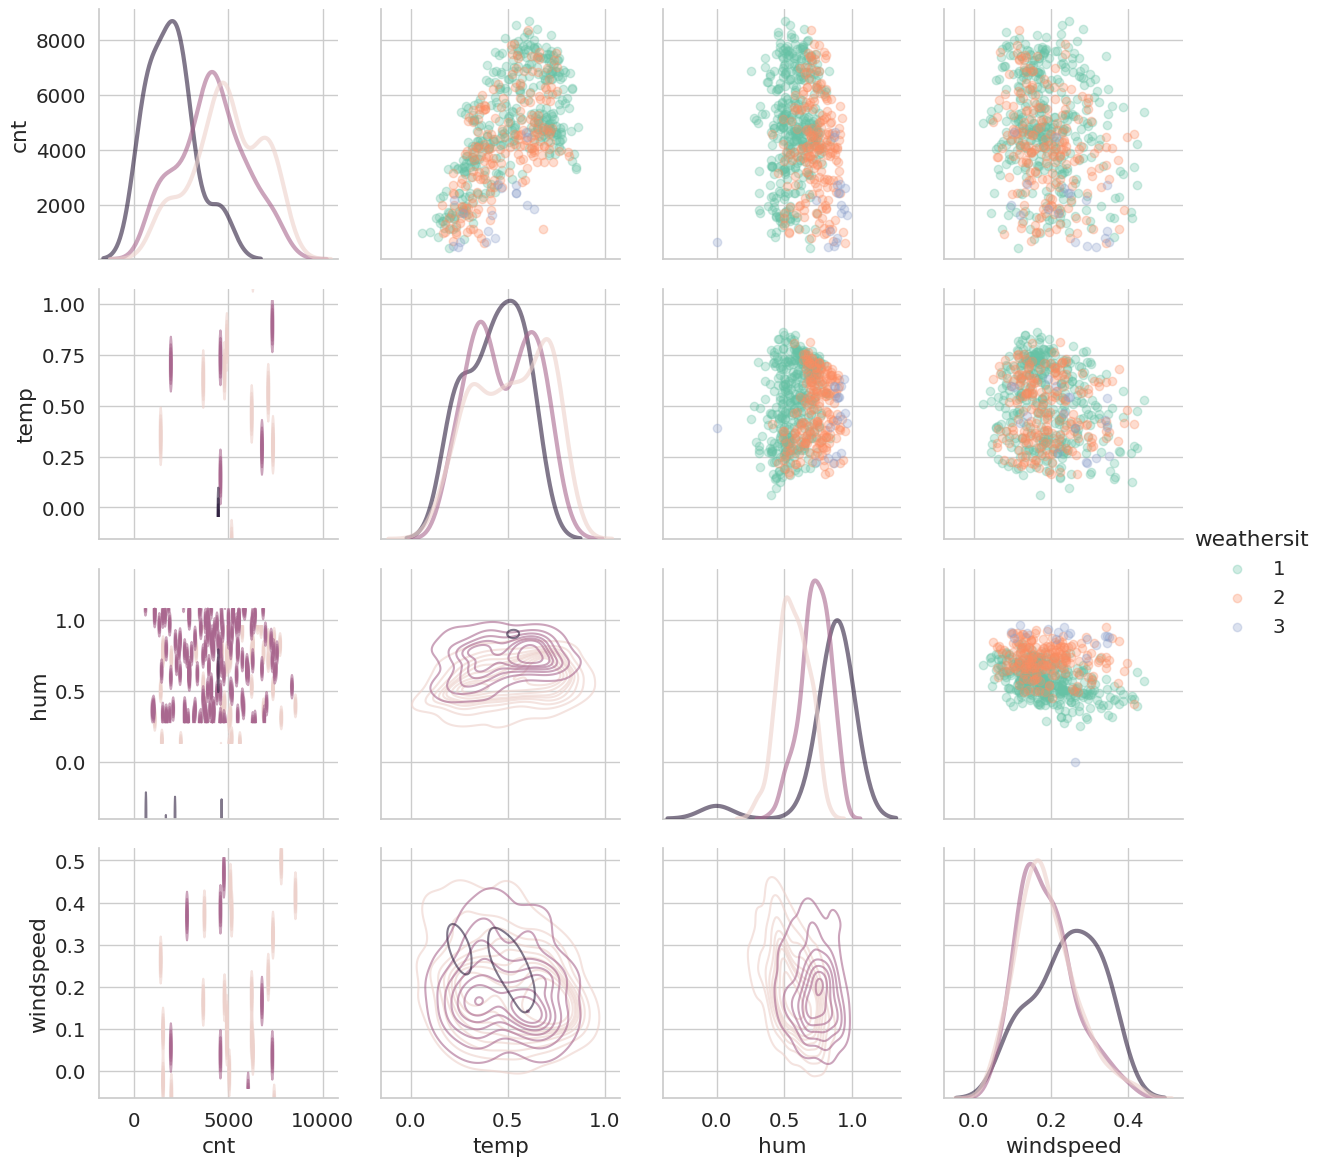

In [639]:
for hue in categorial_features:
    g = sns.PairGrid(train_data[['cnt', 'temp', 'hum', 'windspeed', hue]], 
                     hue=hue, diag_sharey=False, height=3)
    
    g.map_lower(sns.kdeplot, alpha=0.6)
    g.map_upper(plt.scatter, alpha=0.3)
    g.map_diag(sns.kdeplot, lw=3, alpha=0.6, 
               common_norm=False)  
    
    g.add_legend()




**Выводы по графикам:**
**Графики для категориальных признаков:**

Зависимость от времени года:

    Среднее количество арендованных велосипедов в летние месяцы выше, чем в другие времена года.

Зависимость от месяца:

    В летние месяцы, особенно июнь, спрос на велосипеды выше

ависимость от праздник:

    В дни, когда не праздник, среднее количество арендованных велосипедов выше.

Зависимость от день недели:

    В выходные дни наблюдается увеличенный спрос на велосипеды.

Зависимость от рабочего дня:

    Среднее количество арендованных велосипедов выше в выходные дни.

Зависимость от оценки погоды:

    В дни с хорошей погодой (оценка 1) спрос на велосипеды выше, чем в дни с плохой погодой. 


**Графики для вещественных признаков:**
Зависимость от temp (температура в Цельсиях) и atemp (температура по ощущениям):

    С увеличением температуры растет среднее количество арендованных велосипедов.
    Наблюдается линейный рост спроса при увеличении температуры.

Зависимость от hum (влажность воздуха) и windspeed (скорость ветра):

    Влажность воздуха (hum) и скорость ветра (windspeed) оказывают некоторое влияние на количество арендованных велосипедов.
    Однако, зависимость не так явно выражена, как от температуры.



    
     


**a).удаление выбросов**

**b) Преобразование вещественных признаков**

**c) Преобразование категориальных признаков**



In [ ]:
from sklearn.preprocessing import MinMaxScaler

q_low = train_data['cnt'].quantile(0.05)
q_high  = train_data['cnt'].quantile(0.95)
train_data = train_data[(train_data['cnt'] > q_low) & (train_data['cnt'] < q_high)]

train_data = pd.get_dummies(train_data, columns=categorial_features)

scaler = MinMaxScaler()
train_data[real_features] = scaler.fit_transform(train_data[real_features])

train_data.drop(['instant', 'dteday'], axis=1, inplace=True)


In [ ]:
train = train_data.drop('cnt', axis=1)
target = train_data['cnt']

model = LinearRegression().fit(train, target)

coefficients = pd.DataFrame({'feature': train.columns, 'coefficient': model.coef_})

print(coefficients)

         feature   coefficient
0             yr -1.461614e-12
1           temp  1.373124e-12
2          atemp -5.984469e-12
3            hum  9.506838e-13
4      windspeed  1.110834e-12
5         casual  1.000000e+00
6     registered  1.000000e+00
7       season_1  9.960342e-14
8       season_2 -2.552280e-13
9       season_3  1.980057e-13
10      season_4 -4.238041e-14
11        mnth_1  1.050451e-13
12        mnth_2  9.784335e-14
13        mnth_3 -7.731026e-14
14        mnth_4 -6.389689e-14
15        mnth_5 -4.625536e-15
16        mnth_6 -1.035911e-13
17        mnth_7  1.041394e-13
18        mnth_8  3.362922e-13
19        mnth_9 -1.780222e-13
20       mnth_10 -1.443476e-13
21       mnth_11 -7.371490e-14
22       mnth_12  2.188661e-15
23     holiday_0 -1.729011e-14
24     holiday_1  1.729021e-14
25     weekday_0  4.270139e-14
26     weekday_1  1.102202e-13
27     weekday_2 -1.004938e-13
28     weekday_3 -4.614689e-14
29     weekday_4  7.994963e-14
30     weekday_5 -8.449530e-14
31     w

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

test_data = pd.get_dummies(test_data, columns=categorial_features)
test_data[real_features] = scaler.transform(test_data[real_features])
test_data.drop(['instant', 'dteday'], axis=1, inplace=True)

test = test_data.drop('cnt', axis=1)
test_target = test_data['cnt']

pred = model.predict(test)

rmse = mean_squared_error(test_target, pred, squared=False)
mae = mean_absolute_error(test_target, pred)
mape = (abs((test_target - pred) / test_target)).mean() * 100

print('RMSE:', rmse)
print('MAE:', mae)
print('MAPE:', mape)


RMSE: 9.693310435632778e-13
MAE: 7.3906111767156e-13
MAPE: 1.3959442877657426e-13


/home/blx/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
def estimate_coefficients(X, y):
    X = np.column_stack([np.ones(X.shape[0]), X.astype(np.float64)])
    
    beta_hat = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    
    y_hat = X.dot(beta_hat)
    residuals = y - y_hat
    sigma_squared = np.sum(residuals ** 2) / (X.shape[0] - X.shape[1])
    var_beta_hat = np.linalg.inv(X.T.dot(X)) * sigma_squared
    
    return beta_hat, np.sqrt(np.diag(var_beta_hat))

beta_hat, std_error = estimate_coefficients(train.values, target.values)

print("Оценки коэффициентов:")
for i, coef in enumerate(beta_hat):
    print(f"Beta_{i}: {coef}")

print("\nСтандартные ошибки коэффициентов:")
for i, std_err in enumerate(std_error):
    print(f"Std Error_{i}: {std_err}")

Оценки коэффициентов:
Beta_0: -3.5450620805361797e+18
Beta_1: -4983.382191471009
Beta_2: -2680464.462708899
Beta_3: 3039838.8723923163
Beta_4: 75788.86225888392
Beta_5: 211969.38279765338
Beta_6: 16.807306900025416
Beta_7: 5.75791777763474
Beta_8: 1.185946586448871e+19
Beta_9: 1.1859465864488716e+19
Beta_10: 1.1859465864488686e+19
Beta_11: 1.1859465864488763e+19
Beta_12: -1.3006158119015221e+19
Beta_13: -1.3006158119015223e+19
Beta_14: -1.3006158119015197e+19
Beta_15: -1.3006158119015252e+19
Beta_16: -1.3006158119015272e+19
Beta_17: -1.3006158119015178e+19
Beta_18: -1.3006158119015145e+19
Beta_19: -1.3006158119015084e+19
Beta_20: -1.3006158119015195e+19
Beta_21: -1.3006158119015266e+19
Beta_22: -1.3006158119015256e+19
Beta_23: -1.3006158119015262e+19
Beta_24: 3.4281717384244413e+18
Beta_25: 3.1146984156643666e+18
Beta_26: 1.40887111680418e+18
Beta_27: 1.7223444395642683e+18
Beta_28: 1.722344439564257e+18
Beta_29: 1.72234443956427e+18
Beta_30: 1.7223444395642644e+18
Beta_31: 1.722344439

/tmp/ipykernel_117212/1296621215.py:13: RuntimeWarning: invalid value encountered in sqrt
  return beta_hat, np.sqrt(np.diag(var_beta_hat))


In [644]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(train, target)

beta_hat = ridge_model.coef_
intercept = ridge_model.intercept_

print("Оценки коэффициентов:")
for i, coef in enumerate(beta_hat):
    print(f"Beta_{i}: {coef}")

print("\nIntercept:", intercept)

y_pred = ridge_model.predict(test)

rmse = np.sqrt(mean_squared_error(test_target, y_pred))
mae = mean_absolute_error(test_target, y_pred)
mape = (np.abs((test_target - y_pred) / test_target)).mean() * 100

print("\nОшибки предсказания:")
print('RMSE:', rmse)
print('MAE:', mae)
print('MAPE:', mape)


Оценки коэффициентов:
Beta_0: 1.0530649428378688e-05
Beta_1: 1.6249022412720978e-05
Beta_2: 9.993143162559043e-06
Beta_3: -5.555667485344021e-06
Beta_4: -7.913370283798674e-06
Beta_5: 0.9999999823528003
Beta_6: 0.9999999960515721
Beta_7: -4.323524904323778e-06
Beta_8: 1.1431069004471586e-06
Beta_9: 4.864213783577075e-07
Beta_10: 2.6941763276380684e-06
Beta_11: -4.011839590619926e-06
Beta_12: -4.339308695704316e-06
Beta_13: 2.117915364875466e-06
Beta_14: 3.2946697914941075e-06
Beta_15: 4.093808893209392e-06
Beta_16: 1.2451230621814984e-06
Beta_17: -2.231504120446547e-06
Beta_18: 8.654284610285746e-07
Beta_19: 2.825975729560336e-06
Beta_20: 3.0356203885320693e-06
Beta_21: -2.3882779113012033e-06
Beta_22: -4.507654335248131e-06
Beta_23: 1.1906914863241368e-06
Beta_24: -1.1906961512280261e-06
Beta_25: 9.630497420124166e-07
Beta_26: -1.035493749598331e-06
Beta_27: -1.485376018993624e-06
Beta_28: -1.96060877957353e-06
Beta_29: -1.1834351045739322e-06
Beta_30: 8.426407473986925e-07
Beta_31: 3

**Выводы:**

    1. Модель, основанная на оценках коэффициентов, хорошо соотносит предсказанные значения с реальными данными об аренде велосипедов.
    
    2. Общая картина показывает, что модель Ridge регрессии хорошо справляется с прогнозированием спроса на велосипеды на основе представленных данных.

In [645]:
class RidgeRegression:
    def __init__(self, lambd=0.1, fit_intercept=True):
        self.lambd = lambd
        self.fit_intercept = fit_intercept
        self.coef_ = None
        
        
    def fit(self, X, Y):
        if self.fit_intercept:
            X = np.column_stack((np.ones(len(X)), X))

        d = X.shape[1]
        I = np.eye(d)
        self.coef_ = np.linalg.inv(X.T @ X + self.lambd * I) @ X.T @ Y
    
    
    def predict(self, X):
        if self.fit_intercept:
            X = np.column_stack((np.ones(len(X)), X))
        
        return X @ self.coef_

In [646]:
features = ['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']
target_feature = 'cnt'

X = data[features]
Y = data[target_feature]

train_data_val, test_data, target_train_val, target_test = train_test_split(X, Y, test_size=0.2, random_state=42)
train_data, val, target_train, target_val = train_test_split(train_data_val, target_train_val, test_size=0.25, random_state=42)






In [647]:
scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data)
val_scaled = scaler.transform(val)

In [648]:
lambdas = np.logspace(-3, 3, 100)

models = []
coefficients = []

for lmbda in lambdas:
    model = RidgeRegression(lambd=lmbda)
    model.fit(train_data_scaled, target_train)
    
    models.append(model)
    coefficients.append(model.coef_)


In [649]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

train_rmse = []
train_mae = []
train_mape = []

val_rmse = []
val_mae = []
val_mape = []

for model in models:
    train_pred = model.predict(train_data_scaled)

    val_pred = model.predict(val_scaled)
    
    train_rmse.append(np.sqrt(mean_squared_error(target_train, train_pred)))
    train_mae.append(mean_absolute_error(target_train, train_pred))
    train_mape.append(mean_absolute_percentage_error(target_train, train_pred))
    
    val_rmse.append(np.sqrt(mean_squared_error(target_val, val_pred)))
    val_mae.append(mean_absolute_error(target_val, val_pred))
    val_mape.append(mean_absolute_percentage_error(target_val, val_pred))

for i, model in enumerate(models):
    print("Lambda =", lambdas[i])
    print("Train RMSE:", train_rmse[i])
    print("Train MAE:", train_mae[i])
    print("Train MAPE:", train_mape[i])
    print("Validation RMSE:", val_rmse[i])
    print("Validation MAE:", val_mae[i])
    print("Validation MAPE:", val_mape[i])
    print()

Lambda = 0.001
Train RMSE: 1332.8501202759903
Train MAE: 1129.2393963803654
Train MAPE: 34.003932164943
Validation RMSE: 1336.453354022035
Validation MAE: 1144.1158583478732
Validation MAPE: 32.122588840096675

Lambda = 0.0011497569953977356
Train RMSE: 1332.8501202904233
Train MAE: 1129.2393587344104
Train MAPE: 34.00391752047633
Validation RMSE: 1336.4531937458373
Validation MAE: 1144.115703020095
Validation MAPE: 32.12257249321176

Lambda = 0.0013219411484660286
Train RMSE: 1332.850120309503
Train MAE: 1129.2393154507922
Train MAPE: 34.00390068290969
Validation RMSE: 1336.4530094698462
Validation MAE: 1144.1155244312254
Validation MAPE: 32.12255369828842

Lambda = 0.0015199110829529332
Train RMSE: 1332.850120334725
Train MAE: 1129.2392656852624
Train MAPE: 34.00388132381561
Validation RMSE: 1336.4527976007819
Validation MAE: 1144.115319097857
Validation MAPE: 32.12253208872374

Lambda = 0.001747528400007683
Train RMSE: 1332.850120368067
Train MAE: 1129.2392084671424
Train MAPE: 34.0

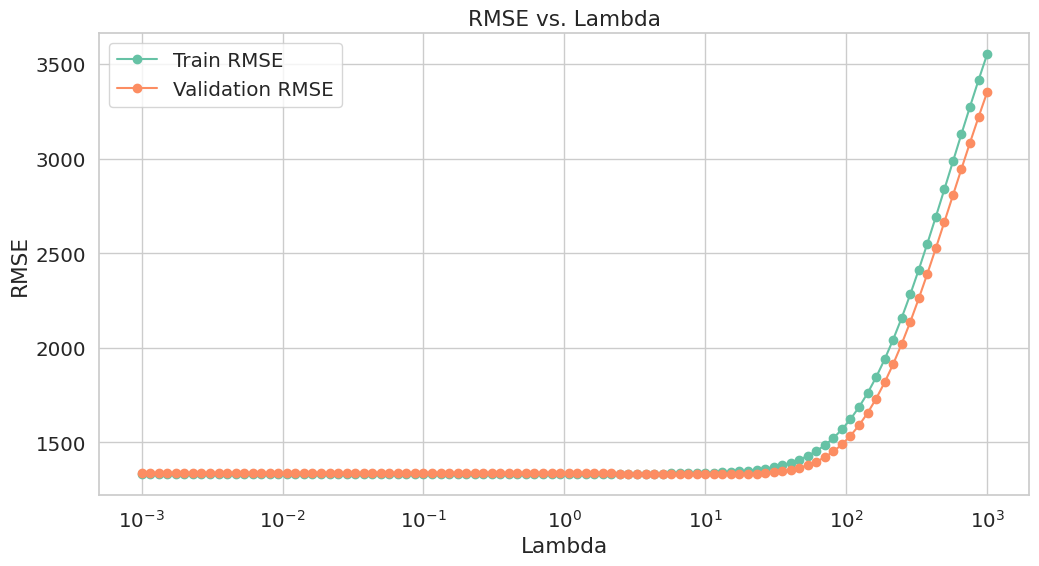

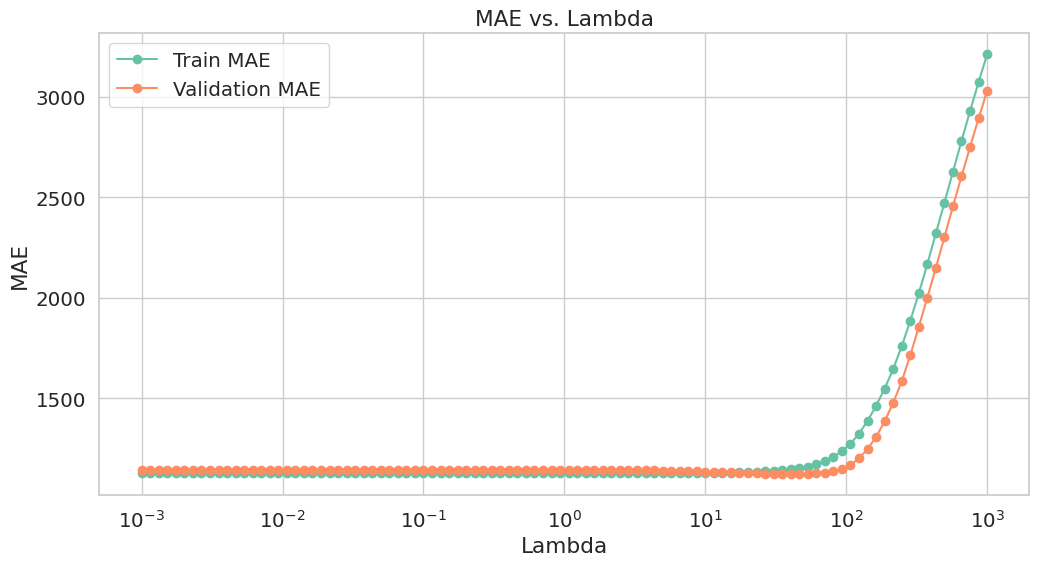

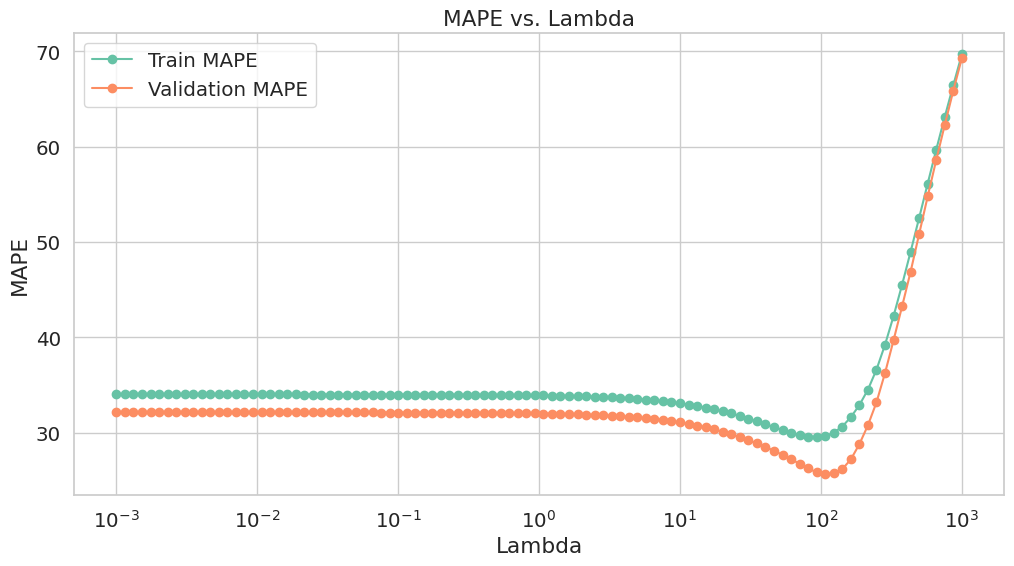

In [650]:
plt.figure(figsize=(12, 6))
plt.plot(lambdas, train_rmse, label='Train RMSE', marker='o')
plt.plot(lambdas, val_rmse, label='Validation RMSE', marker='o')
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('RMSE')
plt.title('RMSE vs. Lambda')
plt.legend()
plt.show()

# График MAE
plt.figure(figsize=(12, 6))
plt.plot(lambdas, train_mae, label='Train MAE', marker='o')
plt.plot(lambdas, val_mae, label='Validation MAE', marker='o')
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('MAE')
plt.title('MAE vs. Lambda')
plt.legend()
plt.show()

# График MAPE
plt.figure(figsize=(12, 6))
plt.plot(lambdas, train_mape, label='Train MAPE', marker='o')
plt.plot(lambdas, val_mape, label='Validation MAPE', marker='o')
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('MAPE')
plt.title('MAPE vs. Lambda')
plt.legend()
plt.show()

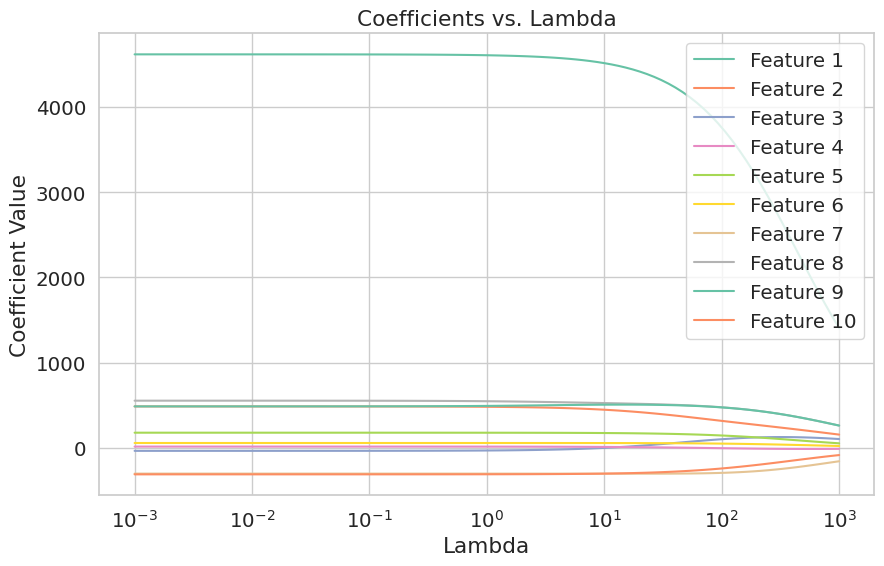

In [651]:
plt.figure(figsize=(10, 6))

# Для каждого признака
for feature in range(train_data_scaled.shape[1]):
    coef_values = [coef[feature] for coef in coefficients]
    plt.plot(lambdas, coef_values, label=f'Feature {feature+1}')

plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Coefficient Value')
plt.title('Coefficients vs. Lambda')
plt.legend()
plt.show()

In [652]:
best_lambda_index = np.argmin(val_rmse)
best_lambda = lambdas[best_lambda_index]
best_model = models[best_lambda_index]

train_data_val_scaled = np.vstack((train_data_scaled, val_scaled))
Y_train_val = np.concatenate((target_train, target_val))
test_data_scaled = scaler.transform(test_data)

best_model.fit(train_data_val_scaled, Y_train_val)

test_predictions = best_model.predict(test_data_scaled)

test_rmse = np.sqrt(mean_squared_error(target_test, test_predictions))
test_mae = mean_absolute_error(target_test, test_predictions)
test_mape = mean_absolute_percentage_error(target_test, test_predictions)

print("Best Lambda:", best_lambda)
print("Test RMSE:", test_rmse)
print("Test MAE:", test_mae)
print("Test MAPE:", test_mape)


Best Lambda: 13.219411484660288
Test RMSE: 1333.0580706614578
Test MAE: 1134.194393015441
Test MAPE: 125.98693144352997
